In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn import model_selection
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import metrics
from sklearn.metrics import recall_score


In [0]:
games = pd.read_csv("game_skater_stats.csv", sep = ",")

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267854 entries, 0 to 267853
Data columns (total 22 columns):
game_id                 267854 non-null int64
player_id               267854 non-null int64
team_id                 267854 non-null int64
timeOnIce               267854 non-null int64
assists                 267854 non-null int64
goals                   267854 non-null int64
shots                   267854 non-null int64
hits                    267854 non-null int64
powerPlayGoals          267854 non-null int64
powerPlayAssists        267854 non-null int64
penaltyMinutes          267854 non-null int64
faceOffWins             267854 non-null int64
faceoffTaken            267854 non-null int64
takeaways               267854 non-null int64
giveaways               267854 non-null int64
shortHandedGoals        267854 non-null int64
shortHandedAssists      267854 non-null int64
blocked                 267854 non-null int64
plusMinus               267854 non-null int64
evenTimeOnIce  

In [17]:
games.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2012030221,8471958,3,1925,0,0,0,3,0,0,...,0,1,0,0,0,5,0,1406,342,177
1,2012030221,8471339,3,1597,1,0,2,3,0,0,...,0,1,3,0,0,2,1,1099,315,183
2,2012030221,8471873,3,1695,0,0,1,2,0,0,...,0,0,0,0,0,2,0,1488,99,108
3,2012030221,8473432,3,957,0,0,3,5,0,0,...,0,0,1,0,0,0,0,957,0,0
4,2012030221,8470192,3,859,0,0,1,0,0,0,...,0,1,0,0,0,2,0,859,0,0


In [18]:
games.describe()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
count,2.678540e+05,2.678540e+05,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,...,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000
mean,2.014705e+09,8.473337e+06,17.635245,993.828392,0.256263,0.151135,1.683096,1.323456,0.032675,0.062344,...,3.373677,0.373939,0.450805,0.004155,0.004293,0.805278,-0.007467,838.290681,68.886427,86.651284
std,1.633526e+06,3.597874e+03,12.254629,293.213382,0.523697,0.401478,1.533294,1.473082,0.183691,0.258192,...,6.221173,0.656171,0.745061,0.064675,0.065725,1.105003,1.096977,238.395434,82.821503,101.101925
min,2.012020e+09,8.448208e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000
25%,2.013021e+09,8.470803e+06,8.000000,800.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,683.000000,0.000000,0.000000
50%,2.015020e+09,8.474150e+06,16.000000,999.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,837.000000,40.000000,52.000000
75%,2.016021e+09,8.475832e+06,24.000000,1187.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,992.000000,116.000000,148.000000
max,2.017030e+09,8.480771e+06,54.000000,2991.000000,5.000000,4.000000,15.000000,15.000000,3.000000,4.000000,...,44.000000,7.000000,8.000000,2.000000,2.000000,15.000000,6.000000,2634.000000,724.000000,922.000000


# Exploratory Data Analysis

In [143]:
print("Dataset Length: ", len(games))
print("Dataset Shape: ", games.shape)

Dataset Length:  267854
Dataset Shape:  (267854, 22)


In [144]:
games.tail()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
267849,2016020251,8475794,25,1229,1,0,1,0,0,1,...,18,0,2,0,0,0,0,848,0,381
267850,2016020251,8475730,25,1199,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1102,60,37
267851,2016020251,8469465,25,1108,0,0,1,0,0,0,...,0,0,1,0,0,2,-1,883,0,225
267852,2016020251,8469455,25,1207,1,0,1,0,0,1,...,13,0,1,0,0,1,0,856,24,327
267853,2016020251,8469665,25,1240,0,1,1,1,0,0,...,0,0,0,0,0,4,0,1081,60,99


Dropping the playerID and teamID columns

In [145]:

features_to_drop = games.columns[0:3]
clean_games = games.drop(features_to_drop, axis=1)
clean_games.head()

,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,1925,0,0,0,3,0,0,0,0,0,1,0,0,0,5,0,1406,342,177
1,1597,1,0,2,3,0,0,0,0,0,1,3,0,0,2,1,1099,315,183
2,1695,0,0,1,2,0,0,0,0,0,0,0,0,0,2,0,1488,99,108
3,957,0,0,3,5,0,0,2,0,0,0,1,0,0,0,0,957,0,0
4,859,0,0,1,0,0,0,2,0,0,1,0,0,0,2,0,859,0,0


In [22]:
print(str(clean_games))

        timeOnIce  assists  goals  shots  hits  powerPlayGoals  \
0            1925        0      0      0     3               0   
1            1597        1      0      2     3               0   
2            1695        0      0      1     2               0   
3             957        0      0      3     5               0   
4             859        0      0      1     0               0   
5            1919        0      1      3     5               0   
6             697        0      0      0     3               0   
7             933        0      0      1     0               0   
8            1183        1      0      4     3               0   
9             777        0      0      1     1               0   
10            624        0      0      0     1               0   
11           1233        0      0      1     5               0   
12            939        0      0      2     5               0   
13           1518        0      1      1     0               0   
14        

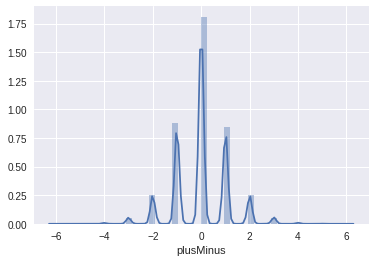

In [23]:
sns.distplot(clean_games["plusMinus"])

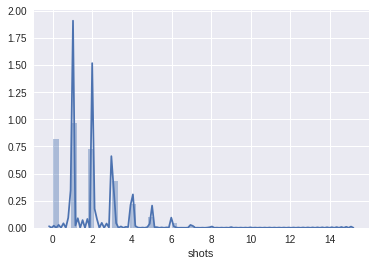

In [24]:
sns.distplot(clean_games["shots"])

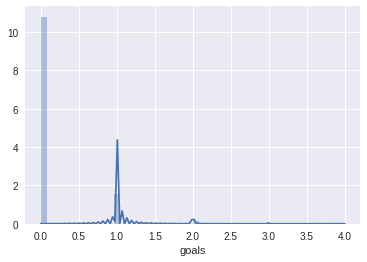

In [25]:
sns.distplot(clean_games["goals"])

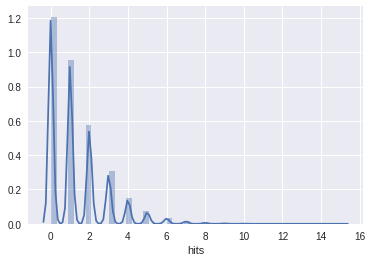

In [26]:
sns.distplot(clean_games["hits"])

# Data Pre-Processing


In [27]:
clean_games.describe()

,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
count,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000
mean,993.828392,0.256263,0.151135,1.683096,1.323456,0.032675,0.062344,0.536729,1.686837,3.373677,0.373939,0.450805,0.004155,0.004293,0.805278,-0.007467,838.290681,68.886427,86.651284
std,293.213382,0.523697,0.401478,1.533294,1.473082,0.183691,0.258192,1.516694,3.342071,6.221173,0.656171,0.745061,0.064675,0.065725,1.105003,1.096977,238.395434,82.821503,101.101925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000
25%,800.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,683.000000,0.000000,0.000000
50%,999.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,837.000000,40.000000,52.000000
75%,1187.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,992.000000,116.000000,148.000000
max,2991.000000,5.000000,4.000000,15.000000,15.000000,3.000000,4.000000,42.000000,31.000000,44.000000,7.000000,8.000000,2.000000,2.000000,15.000000,6.000000,2634.000000,724.000000,922.000000


In [0]:
clean_games.loc[clean_games.goals != 0, 'goals'] = 1
clean_games.loc[clean_games.goals == 0, 'goals'] = 0

In [31]:
goals = clean_games['goals']
clean_games.drop(labels=['goals'], axis=1,inplace = True)
clean_games.insert(0, 'goals', goals)
clean_games

,goals,timeOnIce,assists,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,0,1925,0,0,3,0,0,0,0,0,1,0,0,0,5,0,1406,342,177
1,0,1597,1,2,3,0,0,0,0,0,1,3,0,0,2,1,1099,315,183
2,0,1695,0,1,2,0,0,0,0,0,0,0,0,0,2,0,1488,99,108
3,0,957,0,3,5,0,0,2,0,0,0,1,0,0,0,0,957,0,0
4,0,859,0,1,0,0,0,2,0,0,1,0,0,0,2,0,859,0,0
5,1,1919,0,3,5,0,0,0,0,0,0,1,0,0,3,0,1553,340,26
6,0,697,0,0,3,0,0,0,0,0,0,0,0,0,2,0,652,0,45
7,0,933,0,1,0,0,0,2,0,0,0,1,0,0,1,0,815,0,118
8,0,1183,1,4,3,0,0,0,0,0,1,1,0,0,0,1,1073,110,0
9,0,777,0,1,1,0,0,0,5,8,0,2,0,0,0,0,599,0,178


In [32]:
clean_games.describe()

,goals,timeOnIce,assists,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
count,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000,267854.000000
mean,0.136223,993.828392,0.256263,1.683096,1.323456,0.032675,0.062344,0.536729,1.686837,3.373677,0.373939,0.450805,0.004155,0.004293,0.805278,-0.007467,838.290681,68.886427,86.651284
std,0.343026,293.213382,0.523697,1.533294,1.473082,0.183691,0.258192,1.516694,3.342071,6.221173,0.656171,0.745061,0.064675,0.065725,1.105003,1.096977,238.395434,82.821503,101.101925
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000
25%,0.000000,800.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,683.000000,0.000000,0.000000
50%,0.000000,999.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,837.000000,40.000000,52.000000
75%,0.000000,1187.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,992.000000,116.000000,148.000000
max,1.000000,2991.000000,5.000000,15.000000,15.000000,3.000000,4.000000,42.000000,31.000000,44.000000,7.000000,8.000000,2.000000,2.000000,15.000000,6.000000,2634.000000,724.000000,922.000000


# Data Splitting

In [0]:
kfold = KFold(10, True, 1)
seed= 123
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [34]:
for train, test in kfold.split(clean_games):
    print('train: %s, test: %s' % (train, test))

train: [ 26786  26787  26788 ... 267851 267852 267853], test: [    0     1     2 ... 26783 26784 26785]
train: [     0      1      2 ... 267851 267852 267853], test: [26786 26787 26788 ... 53569 53570 53571]
train: [     0      1      2 ... 267851 267852 267853], test: [53572 53573 53574 ... 80355 80356 80357]
train: [     0      1      2 ... 267851 267852 267853], test: [ 80358  80359  80360 ... 107141 107142 107143]
train: [     0      1      2 ... 267851 267852 267853], test: [107144 107145 107146 ... 133926 133927 133928]
train: [     0      1      2 ... 267851 267852 267853], test: [133929 133930 133931 ... 160711 160712 160713]
train: [     0      1      2 ... 267851 267852 267853], test: [160714 160715 160716 ... 187496 187497 187498]
train: [     0      1      2 ... 267851 267852 267853], test: [187499 187500 187501 ... 214281 214282 214283]
train: [     0      1      2 ... 267851 267852 267853], test: [214284 214285 214286 ... 241066 241067 241068]
train: [     0      1      2

In [0]:
# data splitting
X = clean_games.drop(['goals', ], axis=1)
y = clean_games['goals']

In [44]:
X.head()

,timeOnIce,assists,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,1925,0,0,3,0,0,0,0,0,1,0,0,0,5,0,1406,342,177
1,1597,1,2,3,0,0,0,0,0,1,3,0,0,2,1,1099,315,183
2,1695,0,1,2,0,0,0,0,0,0,0,0,0,2,0,1488,99,108
3,957,0,3,5,0,0,2,0,0,0,1,0,0,0,0,957,0,0
4,859,0,1,0,0,0,2,0,0,1,0,0,0,2,0,859,0,0


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: goals, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [77]:
X_test

,timeOnIce,assists,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
105008,697,1,3,2,0,0,0,4,7,0,0,0,0,1,1,608,0,89
117585,584,0,1,0,0,0,0,2,3,1,0,0,0,0,1,584,0,0
176681,883,0,1,3,0,0,0,0,0,0,2,0,0,0,-1,883,0,0
140822,839,1,1,7,0,0,0,0,1,1,0,0,0,0,0,717,94,28
51839,819,0,3,2,0,0,0,0,1,0,0,0,0,1,0,819,0,0
236118,1431,0,1,2,0,0,0,0,0,0,0,0,0,3,0,1357,74,0
199762,820,1,0,1,0,0,0,0,1,1,0,0,0,0,1,683,137,0
216214,1164,0,0,0,0,0,0,10,20,0,0,0,0,0,-1,811,247,106
195226,411,0,0,0,0,0,0,1,1,0,0,0,0,0,-1,411,0,0
210769,1449,0,2,4,0,0,0,12,23,0,0,0,0,1,0,1155,41,253


In [146]:
len(X_train),  len(X_test), len(y_train), len(y_test)

(179462, 88392, 179462, 88392)

# Scaling Features

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [148]:
print(X_train)

[[-1.14038662 -0.48917043 -0.44587061 ... -1.39659855  0.78706378
  -0.65811761]
 [-0.464239   -0.48917043  0.8567517  ... -0.25873046 -0.83140701
  -0.05433546]
 [ 0.78902451 -0.48917043  1.50806285 ...  0.71958417 -0.39659396
   0.9156752 ]
 ...
 [ 1.32857664 -0.48917043 -1.09718177 ...  2.21854693 -0.83140701
  -0.69770989]
 [ 0.15044065 -0.48917043 -0.44587061 ... -0.77098104  3.03359786
  -0.23250069]
 [ 1.21930026 -0.48917043 -1.09718177 ...  1.88264491 -0.05840603
  -0.85607898]]


# Neural Network

In [0]:
classifier = Sequential()
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim=18))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae', 'acc'])

In [0]:
# No dropout in this nnet
# classifier.fit(X_train, y_train, batch_size = 30, epochs = 100)


In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [83]:
cm

array([[ 3731, 72727],
       [  831, 11103]])

Network Evaluation

In [84]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.693190454266084
Test accuracy: 0.5000216332223364


In [0]:
# Using Dropout

# Dropout to reduce overfitting

In [0]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim=18))
# Notice the dropouts
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy', 'mae'])

In [192]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 6)                 114       
_________________________________________________________________
dropout_10 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_11 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_12 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 7         
Total para

In [0]:
classifier.fit(X_train, y_train, batch_size = 20, epochs = 500)

Epoch 1/500
179462/179462 [==============================] - 12s 69us/step - loss: 0.2663 - acc: 0.9019 - mean_absolute_error: 0.1621
Epoch 2/500
179462/179462 [==============================] - 12s 65us/step - loss: 0.2496 - acc: 0.9099 - mean_absolute_error: 0.1490
Epoch 3/500
179462/179462 [==============================] - 12s 64us/step - loss: 0.2472 - acc: 0.9095 - mean_absolute_error: 0.1473
Epoch 4/500
179462/179462 [==============================] - 12s 65us/step - loss: 0.2454 - acc: 0.9091 - mean_absolute_error: 0.1467
Epoch 5/500
179462/179462 [==============================] - 12s 65us/step - loss: 0.2449 - acc: 0.9087 - mean_absolute_error: 0.1464
Epoch 6/500
179462/179462 [==============================] - 12s 65us/step - loss: 0.2455 - acc: 0.9087 - mean_absolute_error: 0.1467
Epoch 7/500
179462/179462 [==============================] - 12s 65us/step - loss: 0.2454 - acc: 0.9088 - mean_absolute_error: 0.1467
Epoch 8/500
179462/179462 [==============================] - 1

In [175]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2544581209149163
Test accuracy: 0.9102181192868133


In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [177]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[72930  3528]
 [ 4408  7526]]


In [178]:
# Imbalanced Classes
y_test.value_counts()


0    76458
1    11934
Name: goals, dtype: int64

# Classification Metrics

Accuracy

In [179]:
# calculate and print accuracy
print((TP + TN) / float(TP + TN + FP + FN))

0.9102181192868133


Classfication Error

In [180]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)


0.08978188071318671


In this problem the sensitivity is the model's ability to correctly identify the players who scored. the specificity is the model's ability to correctly identify the players who didn't score a goal.

Sensitivity- This neural network model correctly identifies players who scored about 51% of the time.

In [181]:
sensitivity = TP / float(FN + TP)
print(sensitivity)

0.6306351600469248


Specificity- Whereas this model can correctly identify players who didn't score 97% of the time

This means the model is a good predictor of players who aren't scoring in a game. 

In [182]:
specificity = TN / (TN + FP)

print(specificity)

0.9538570195401397


False Positive Rate

In [183]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)

0.04614298045986032


Precision

In [184]:
precision = TP / float(TP + FP)
print(precision)


0.6808395151076534


Recall

In [185]:

recall = recall_score(y_test, y_pred)
print(recall)

0.6306351600469248


Predicted Probabilities - The probability a player will score

In [0]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 0 ]

In [187]:
print(y_pred_prob[0:10])

[3.7926647e-01 4.4393998e-01 3.2629699e-02 3.9906044e-02 3.5305524e-01
 6.6994563e-02 1.4060288e-04 1.3569342e-04 1.8877417e-05 2.5747827e-01]


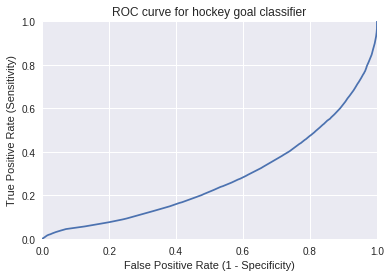

In [167]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for hockey goal classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Classification Report 

In [170]:
from sklearn.metrics import classification_report
target_names = ['no goal', 'goal']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    no goal       0.86      0.93      0.89     76458
       goal       0.09      0.04      0.06     11934

avg / total       0.76      0.81      0.78     88392



Log Loss

In [171]:
from sklearn.metrics import log_loss
print(log_loss(y_test, y_pred))

6.579812715222206


You can see the the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions.

In [173]:
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.2791141795583681


In [108]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.46


This means that a dumb model that always predicts 0 would be right 86% of the time

This shows how classification accuracy is not that good as it's close to a dumb model
It's a good way to know the minimum we should achieve with our models

In [110]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())


0.8649877816997014

Plotting Metrics

Epoch 1/100
179462/179462 [==============================] - 11s 60us/step - loss: 0.2255 - acc: 0.9130 - mean_absolute_error: 0.1328
Epoch 2/100
179462/179462 [==============================] - 11s 61us/step - loss: 0.2257 - acc: 0.9131 - mean_absolute_error: 0.1328
Epoch 3/100
179462/179462 [==============================] - 11s 60us/step - loss: 0.2257 - acc: 0.9128 - mean_absolute_error: 0.1328
Epoch 4/100
179462/179462 [==============================] - 11s 60us/step - loss: 0.2253 - acc: 0.9132 - mean_absolute_error: 0.1326
Epoch 5/100
179462/179462 [==============================] - 11s 59us/step - loss: 0.2260 - acc: 0.9129 - mean_absolute_error: 0.1330
Epoch 6/100
179462/179462 [==============================] - 11s 59us/step - loss: 0.2254 - acc: 0.9132 - mean_absolute_error: 0.1327
Epoch 7/100
179462/179462 [==============================] - 11s 59us/step - loss: 0.2253 - acc: 0.9130 - mean_absolute_error: 0.1325
Epoch 8/100
179462/179462 [==============================] - 1

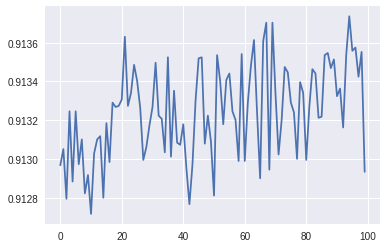

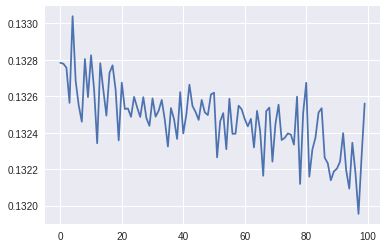

In [189]:
# plot metrics
from matplotlib import pyplot
history =  classifier.fit(X_train, y_train, batch_size = 20, epochs = 100)
pyplot.plot(history.history['acc'])
pyplot.show()
pyplot.plot(history.history['mean_absolute_error'])
pyplot.show()

In [0]:
import matplotlib.pyplot as plt
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Parameter Tuning

In [0]:
def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['mae', 'acc'])
    return classifier

In [0]:
classifier = KerasClassifier(build_fn = make_classifier)

In [0]:
params = {
    'batch_size':[20,35],

    'nb_epoch':[150,500],

    'optimizer':['adam','rmsprop']
}

In [0]:
grid_search = GridSearchCV(estimator= classifier,
                           param_grid= params,
                           scoring= 'accuracy',
                           cv= 10)

In [0]:
grid_search

In [0]:
grid_search = grid_search.fit(X_train,y_train)

In [0]:
best_param = grid_search.best_params_

best_accuracy = grid_search.best_score_

In [0]:
best_param

In [0]:
best_accuracy

# Logistic Regression

In [121]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((179462, 18), (179462,), (88392, 18), (88392,))

In [131]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred= logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

90.99

In [130]:
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    no goal       0.89      1.00      0.94     76458
       goal       1.00      0.24      0.38     11934

avg / total       0.91      0.90      0.87     88392



# Linear SVC

In [141]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

90.83

# Simple NNet

In [140]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


75.57

# Gaussian Naive Bayes

In [0]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

# K Nearest Neighbors

In [0]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

# Decision Trees

In [122]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [123]:
y_pred = clf_gini.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])